In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/Housing.csv')

In [ ]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [ ]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [ ]:
y_data=df.iloc[:,0]
y_data

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

In [ ]:
X_half2=df.iloc[:,5:10]
X_half2
X_ex2 = df.iloc[:,11:]
X_half2 = pd.concat([X_half2, X_ex2], axis=1)
X_half2.head()
X_half3=X_half2.drop(['furnishingstatus'],axis=1)

In [ ]:
X_data = df.iloc[:, 1:5]
X_ex = df[['parking']]
X_half = pd.concat([X_data, X_ex], axis=1)
X_half.head()
X_norm=X_data[['area']]
X_norm

,area
0,7420
1,8960
2,9960
3,7500
4,7420
...,...
540,3000
541,2400
542,3620
543,2910


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, LabelEncoder,Normalizer,StandardScaler
import pandas as pd



In [ ]:
scaler=StandardScaler()
X_norm=pd.DataFrame(scaler.fit_transform(X_norm))
X_norm.head()
X_half = pd.concat([X_data, X_norm], axis=1)
X_half.drop(['area'],axis=1,inplace=True)
X_half.rename(columns={0:'area'},inplace=True)
# X_half.drop(X_half['area'],inplace=True,axis=1)
X_half

,bedrooms,bathrooms,stories,area
0,4,2,3,1.046726
1,4,4,4,1.757010
2,3,2,2,2.218232
3,4,2,2,1.083624
4,4,1,2,1.046726
...,...,...,...,...
540,2,1,1,-0.991879
541,3,1,1,-1.268613
542,2,1,1,-0.705921
543,3,1,1,-1.033389


<Axes: >

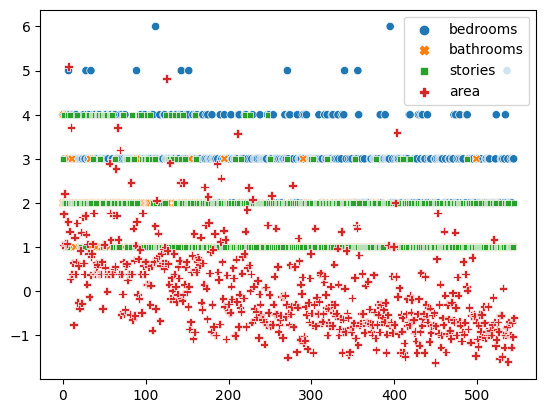

In [ ]:
sns.scatterplot(X_half)

In [ ]:
ordinal=OrdinalEncoder(categories=[['unfurnished','semi-furnished','furnished']])
ordinal.fit(X_half2[['furnishingstatus']])
X_ord=ordinal.transform(X_half2[['furnishingstatus']])
X_ord
le = LabelEncoder()
categorical_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

for col in categorical_columns:
    X_half3[col] = le.fit_transform(X_half3[col])
X_half3

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,1,0,0,0,1,1
1,1,0,0,0,1,0
2,1,0,1,0,0,1
3,1,0,1,0,1,1
4,1,1,1,0,1,0
...,...,...,...,...,...,...
540,1,0,1,0,0,0
541,0,0,0,0,0,0
542,1,0,0,0,0,0
543,0,0,0,0,0,0


In [ ]:
X_half_df = pd.DataFrame(X_half)
X_ord_df = pd.DataFrame(X_ord)
X_half3_df = pd.DataFrame(X_half3)

# Concatenate the DataFrames horizontally along columns
X_data = pd.concat([X_half_df, X_ord_df, X_half3_df], axis=1)
# X_data.drop(X_data['0'],axis=1,inplace=True)
X_data

,bedrooms,bathrooms,stories,area,0,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,4,2,3,1.046726,2.0,1,0,0,0,1,1
1,4,4,4,1.757010,2.0,1,0,0,0,1,0
2,3,2,2,2.218232,1.0,1,0,1,0,0,1
3,4,2,2,1.083624,2.0,1,0,1,0,1,1
4,4,1,2,1.046726,2.0,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
540,2,1,1,-0.991879,0.0,1,0,1,0,0,0
541,3,1,1,-1.268613,1.0,0,0,0,0,0,0
542,2,1,1,-0.705921,0.0,1,0,0,0,0,0
543,3,1,1,-1.033389,2.0,0,0,0,0,0,0


<Axes: >

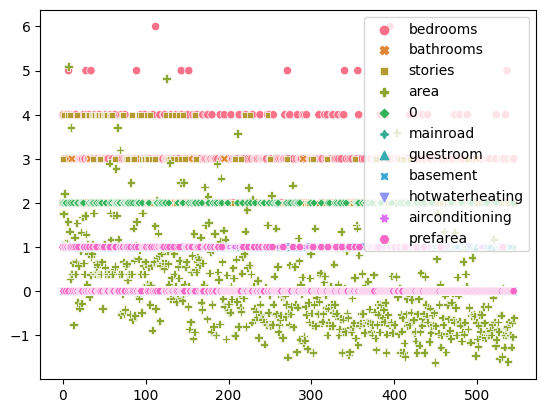

In [ ]:
# X_data_upd = X_data.drop(['mainroad', 'hotwaterheating', 'guestroom'], axis=1)
sns.scatterplot(X_data)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_data,y_data,test_size=0.3)

In [ ]:
print(X_test.shape)
print(X_train.shape)
print(y_train.shape)
print(y_test.shape)

(164, 11)
(381, 11)
(381,)
(164,)


In [ ]:
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB

In [ ]:
lr=LinearRegression()


In [ ]:
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import accuracy_score,r2_score

In [ ]:
prediction=lr.predict(X_test)

In [ ]:
y_test[0]

13300000

In [ ]:
prediction[0]

7146657.3174345605

In [ ]:
# accuracy_score(y_test,prediction)
r2 = r2_score(y_test, prediction)
r2

0.6515180496458088

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mse=mean_squared_error(y_test,prediction)

In [ ]:
np.sqrt(mse)

1371885.6064415593